In [31]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Evanston_Arrests.csv')

In [3]:

df = pd.DataFrame(data,columns = ['Arrest Key','Relates Incident Number','Day of the Week','Arrest Date','Arrest Time','Age','Sex','Race','Ethnicity',
                                  'Arrest Type','Weapon Code','Street Number','Street Name','City','Location'])

In [4]:
City = df['City']
index_not_Evan = [i for i in range(len(City)) if City[i] != 'EVANSTON'] 
df = df.drop(index_not_Evan)
df.reset_index(inplace=True)

In [5]:
Time = df['Arrest Time']
#df['Arrest Time']= map(lambda x: x.zfill(4),df['Arrest Time'])
df['Arrest Time']=df['Arrest Time'].apply(lambda x: '{0:0>4}'.format(x))

In [6]:
# get the clock of the day 
df['time'] = df['Arrest Time']

In [7]:
def get_time(x):
    x = str(x)
    x = x[:2]
    x = int(x)
    return x

In [8]:

df['time'] = df['time'].apply(get_time)

In [9]:
print(df['time'])

0       8
1      19
2      12
3      18
4      10
5       4
6       4
7      22
8      19
9      16
10     20
11     20
12      1
13     20
14     16
15     10
16     13
17      0
18      8
19     10
20     16
21      1
22      5
23      0
24      1
25      8
26     23
27     14
28     13
29      2
       ..
514    16
515    10
516    13
517    16
518    19
519    20
520    21
521     1
522    21
523     2
524    12
525    16
526    15
527    15
528    15
529    10
530    14
531    21
532     1
533     1
534     1
535    17
536    14
537    19
538    15
539    15
540    11
541    11
542    16
543     9
Name: time, Length: 544, dtype: int64


In [10]:
def compare_n(x):
    if 8 <= x < 20:
        Isday = True
    else:
        Isday = False
    return Isday

In [11]:
df['Isday'] = df['time'].apply(compare_n)

In [12]:
print(df.head(5))

   index  Arrest Key  Relates Incident Number Day of the Week  \
0      0       37058                 18008504             Mon   
1      1       48341                 18000033             Tue   
2      2       48343                 18000040             Wed   
3      3       48345                 18000055             Wed   
4      4       48348                 18000104             Fri   

              Arrest Date Arrest Time  Age     Sex   Race     Ethnicity  \
0  08/28/2017 12:00:00 AM        0825   50  Female  Black  Not Hispanic   
1  01/02/2018 12:00:00 AM        1900   17    Male  White           NaN   
2  01/03/2018 12:00:00 AM        1214   42    Male  Black           NaN   
3  01/03/2018 12:00:00 AM        1844   31  Female  Black           NaN   
4  01/05/2018 12:00:00 AM        1008   19    Male  White  Not Hispanic   

          Arrest Type                 Weapon Code  Street Number Street Name  \
0  Taken into Custody                        None         1900.0   DARROW AV  

In [13]:
print(len(df))

544


In [14]:
day_date = []
night_date = []
for i in range(len(df)):
    if df['Isday'][i] == 1:
        day_date.append(i)
    else:
        night_date.append(i)

In [15]:
print(day_date)
print(night_date)

[0, 1, 2, 3, 4, 8, 9, 14, 15, 16, 18, 19, 20, 25, 27, 28, 31, 32, 33, 35, 36, 37, 38, 39, 40, 43, 46, 48, 49, 56, 57, 59, 61, 62, 65, 67, 68, 69, 70, 71, 72, 73, 74, 78, 80, 81, 82, 86, 87, 88, 89, 90, 92, 95, 96, 97, 98, 103, 104, 106, 107, 109, 110, 111, 113, 117, 119, 121, 122, 125, 126, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 142, 143, 145, 146, 148, 149, 150, 153, 155, 156, 157, 162, 163, 164, 169, 171, 172, 173, 176, 177, 178, 182, 183, 184, 189, 191, 192, 193, 195, 197, 198, 199, 200, 205, 210, 212, 214, 215, 217, 221, 224, 233, 235, 238, 239, 240, 241, 242, 243, 244, 249, 250, 251, 252, 254, 255, 258, 260, 261, 262, 264, 265, 266, 267, 268, 269, 270, 272, 273, 274, 275, 277, 278, 279, 280, 281, 284, 285, 286, 290, 291, 292, 293, 294, 295, 296, 299, 301, 309, 310, 311, 313, 314, 315, 316, 317, 319, 320, 321, 324, 325, 326, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 353, 354, 355, 356, 357, 360, 365, 366, 370, 371

In [16]:
df_day = df.iloc[day_date]

In [17]:
df_night = df.iloc[night_date]

In [18]:
df_day.reset_index(inplace=True)
df_night.reset_index(inplace=True)

In [19]:
# the location gathering
location = df_day['Location']
print(len(location))
location[0]

319


'(42.052982334727446, -87.69734651386223)'

In [20]:
loc_null = location.isnull()
day_x = []
day_y = []
for i in range(len(location)):
    loca = location[i]
    if loc_null[i] == 0:
        loc = loca.split(',')
        #print(i)
        day_x.append(loc[0][1:])
        day_y.append(loc[1][:-1])

In [21]:
ymin = -87.727
ymax = -87.665
xmax = 42.068
xmin = 42.018

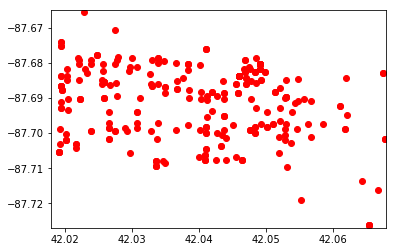

In [22]:
import matplotlib.pyplot as plt
plt.scatter(day_x,day_y,c = 'r')
plt.xlim((xmin,xmax))
plt.ylim((ymin,ymax))
plt.show()

In [23]:
a = 42.067844181835355-42.01912576109617
b = -87.72626851879919--87.66542545295692

In [24]:
xxx = []
for i in day_x:
    val = np.float(i)
    xxx.append(val)

In [25]:
yyy = []
for i in day_y:
    val = np.float(i)
    yyy.append(val)

In [26]:
new_x = abs(np.array(xxx) - 42.067844181835355) * (538/a)
new_y = abs(np.array(yyy) + 87.72626851879919) * (581/-b)

(562, 662, 4)


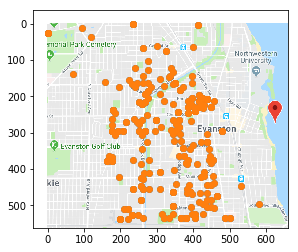

In [28]:
img = plt.imread('map2.png')
implot = plt.imshow(img)
print(img.shape)
plt.scatter(new_y,new_x)
#plt.scatter(new_yc,new_xc,c = 'r')
# the location gathering
location = df_day['Location']
print(len(location))
location[0]plt.show()

225
(562, 662, 4)


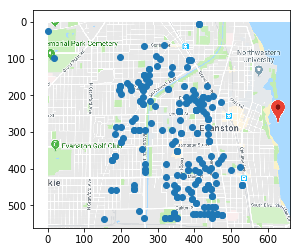

In [30]:
# the location gathering
location = df_night['Location']
print(len(location))
location[0]

loc_null = location.isnull()
night_x = []
night_y = []
for i in range(len(location)):
    loca = location[i]
    if loc_null[i] == 0:
        loc = loca.split(',')
        #print(i)
        night_x.append(loc[0][1:])
        night_y.append(loc[1][:-1])

xxxx = []
for i in night_x:
    val = np.float(i)
    xxxx.append(val)
    
yyyy = []
for i in night_y:
    val = np.float(i)
    yyyy.append(val)
    
new_xx = abs(np.array(xxxx) - 42.067844181835355) * (538/a)
new_yy = abs(np.array(yyyy) + 87.72626851879919) * (581/-b)    


img = plt.imread('map2.png')
implot = plt.imshow(img)
print(img.shape)
plt.scatter(new_yy,new_xx)
#plt.scatter(new_yc,new_xc,c = 'r')
plt.show()